In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import tqdm

import setigen as stg
import blscint as bls
# from bls import *
import scipy.special
import scipy.stats
from astropy.stats import sigma_clip

from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord

import sprofiler as sp
import numpy as np

bshuf filter already loaded, skip it.


In [2]:
%matplotlib inline

(16, 1024)


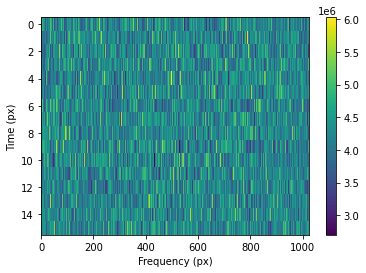

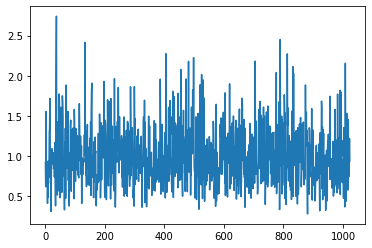

0.13442344571238685
0.125
0.12622549019607843
0.13408604863514031


In [104]:
N = 51
d = 2
frame = stg.Frame.from_backend_params(fchans=1024, int_factor=N)
print(frame.shape)

frame.add_noise_from_obs()
frame.plot()
plt.show()

x = frame.data
x_sum  = np.sum(x, axis=0)
x2_sum = np.sum(x**2, axis=0)
M = x.shape[0]
SK = (N*M*d+1) / (M-1) * (M*(x2_sum / (x_sum*x_sum)) - 1).squeeze()

plt.plot(SK)
plt.show()

print(np.var(SK))
print(2/M)
print(2/M*(1+1/d/N))
# Scaling O(1/M^2) term to show it makes a difference
print(2/M*(1+1/d/N+1/N**2)+1/M**2 * 2)

In [87]:
1/M**2, 1/N**2

(0.00390625, 0.00038446751249519417)